# Data Cleaning

Data Cleaning step is formed by 9 steps/sections as folllows;
1. <a href='#unnecessary_data_section'><b>Unnecessary Data</b></a>
2. <a href='#duplicate_data_section'><b>Duplicate Data</b></a>
3. <a href='#data_types_section'><b>Data Types</b></a>
4. <a href='#typo_section'><b>Typo</b></a>
5. <a href='#missing_data_section'><b>Missing Data</b></a>
6. <a href='#outlier_section'><b>Outlier</b></a>
7. <a href='#common_proper_terminology_section'><b>Common Proper Terminology</b></a>
8. <a href='#re_naming_section'><b>Re-Name</b></a>
9. <a href='#format_section'><b>Format</b></a>

---

## Data Read

In [1]:
# Import necessary libraries for data obtaining
import pandas as pd

In [2]:
raw_data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

---

<a id='unnecessary_data_section'></a>
## 1. Unnecessary Data

Unnecessary data in the dataset is checked and if there is any they are removed from the dataset in this section.

In [3]:
raw_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [10]:
raw_data.columns.value_counts().sum()

22

There are 22 features in the dataset and all are related with the business problem which is diabetes classification.

<a id='duplicate_data_section'></a>
## 2. Duplicate Data

Duplicate data in the dataset is checked and if there is any they are removed from the dataset in this section.

In [24]:
raw_data.duplicated(keep=False).value_counts()

False    218105
True      35575
dtype: int64

In [21]:
# Duplicated data detection
raw_data[raw_data.duplicated(keep=False)]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
25,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
29,0.0,0.0,1.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
44,0.0,0.0,1.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
52,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,1.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


There are **35575 records** as duplicated data. However, it is left to investigate more in the later steps. Because, criterias are too general to accept records as duplicated records instead of representing the same person in the different record rows.

<a id='data_types_section'></a>
## 3. Data Types

Data types of the values in the dataset is checked and if there is a improper data type, then it is changed with the proper data type in this section.

In [25]:
raw_data.head(2)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0


In [26]:
raw_data.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

All of the features have float data type. Thus, encoding won' t be required for the later steps.

<a id='typo_section'></a>
## 4. Typo

Dataset is checked if there is any typo and if there is some kind of typo, then it is corrected in this section.

It seems there is no typo in the dataset.

<a id='missing_data_section'></a>
## 5. Missing Data

Missing data in the dataset is checked. There is two main way to deal with the missing data as removing entire row/column or filling with the proper data. 
In the filling way, there is some applied methods such as mean value of the feature can be used to fill the missing data in continious case, and another way is using the most used(higher frequency) categorical value to fill the missing data.

In [33]:
raw_data.isna().value_counts()

Diabetes_binary  HighBP  HighChol  CholCheck  BMI    Smoker  Stroke  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex    Age    Education  Income
False            False   False     False      False  False   False   False                 False         False   False    False              False          False        False    False     False     False     False  False  False      False     253680
dtype: int64

It seems there is no missing data.

<a id='outlier_section'></a>
## 6. Outlier

Outliers in the dataset is checked and if reliability and validity of the dataset is effected by those outliers, then these outliers are removed from the dataset. <br>
In the Outliers concept, numerical columns will be considered with the column' s feature context. Therefore, negativity, positivity and neutrality properties will be considered as well as amount of the feature's numerical content.

In [42]:
# Negativity check on the numerical columns
# Some negative values might be caused from the outliers in the dataset if the column is expected as positive numbers
# Following code might be useful
k=0
for i in raw_data.columns:
    if raw_data[i].dtypes != 'object'and (True in (raw_data[i] < 0).unique()):
        k+=1
        print('There is negativity in the '+ i +' column as follows: %s' % raw_data[raw_data[i] < 0])

if k == 0:
    print('There is no negativity in the numerical columns!!!')

There is no negativity in the numerical columns!!!


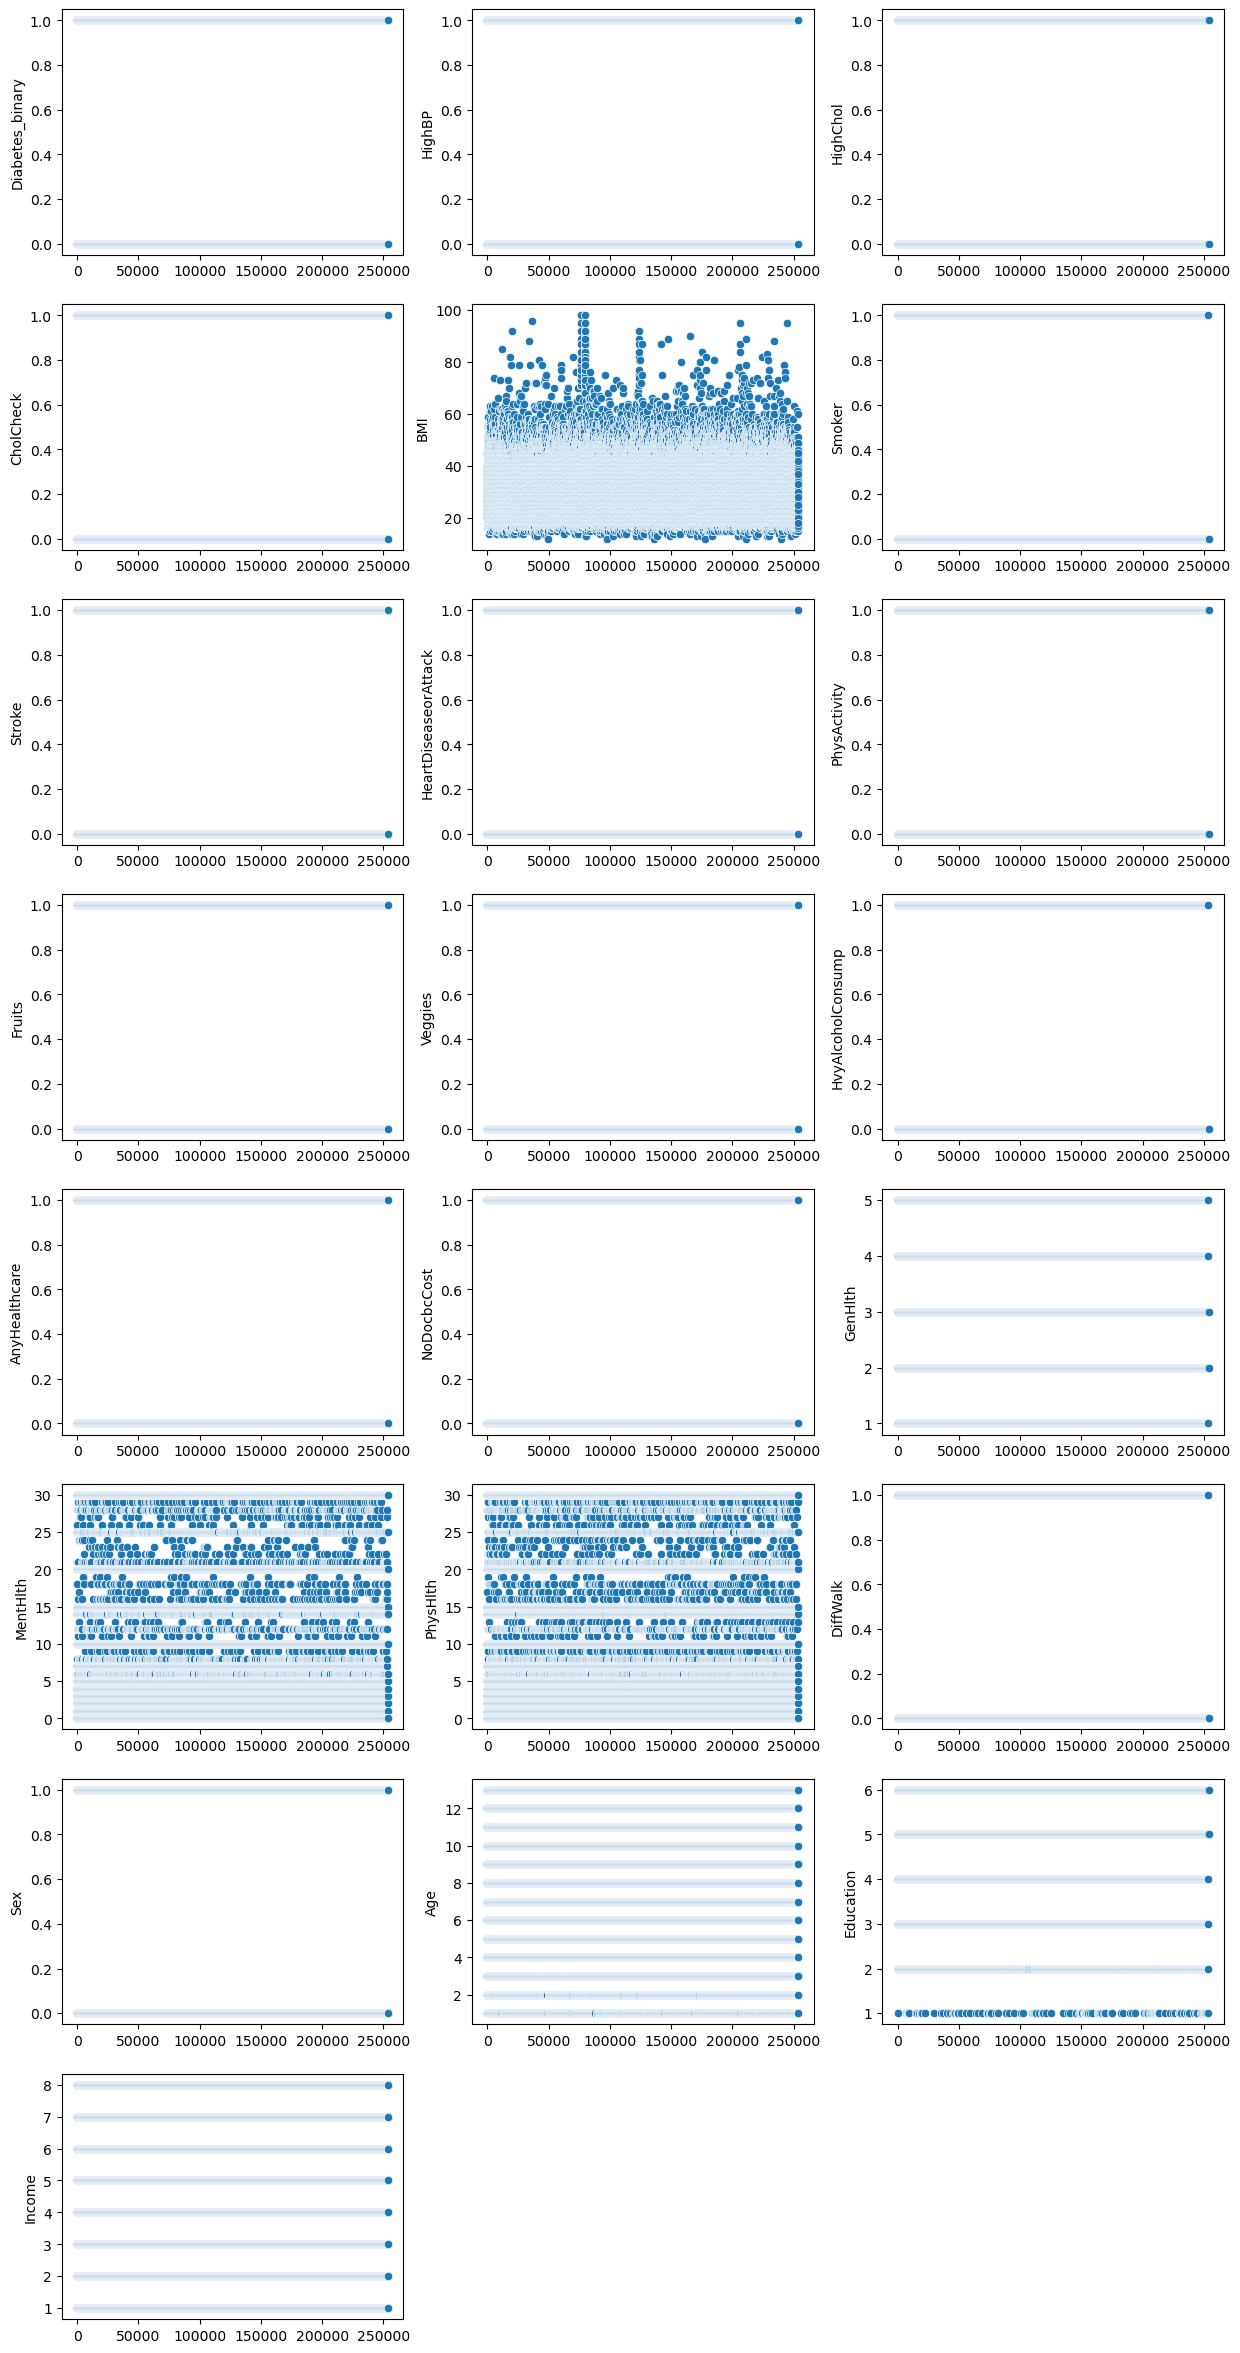

In [46]:
# Scatter plot might help to detect outliers intuitively
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,30))
for i, j in enumerate(raw_data):
    plt.subplot(8,3, i+1)
    sns.scatterplot(raw_data, x=raw_data.index, y=j)

In aspect of the negativity there is no outliers. According to the result of scatter plot and feature explanations in the [**UCI ML Repository - CDC Diabetes Health Indicators**](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators) only BMI might have outliers it shoulf be investigated in the later steps.

<a id='common_proper_terminology_section'></a>
## 7. Common Proper Terminology

If there is different expressions that represents the same thing, then these different expressions are changed with the only only one common and proper expression. Thus, a common and proper terminology requirement in the dataset is satisfied.

In [47]:
# Check the data set ain aspect of their unique values. If the unique some values refer to same thing, 
# then change them with a common proper terminology
raw_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


It seems there is no uncommon proper terminology.

<a id='re_naming_section'></a>
## 8. Re-Name

There could be some removed raws and columns. Therefore, in order to keep integrity of the dataset, index and column numbers/names might be needed to changed. Thus, re-indexing and column name arranging is made.

There is no renamed feature or re-indexing.

<a id='format_section'></a>
## 9. Format

Data is cleaned so far. Hence, the dataset is stored with the proper file formatting in this section.

In [ ]:
# No change has done so far. Thus, the dataset will remain the same.

---